In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from scipy.stats import wilcoxon
print("All packages are imported")

All packages are imported


In [2]:
# Load dataset
data = pd.read_csv('non_parametric_tests_data.csv')

In [3]:
data.head()

Customer_ID    Store  Satisfaction_Score  Satisfaction_Before  \
0            1  Store A            9.726262             9.174393   
1            2  Store B            7.976195             3.156057   
2            3  Store A            9.455490             2.304054   
3            4  Store A            9.053446             5.405075   
4            5  Store A            6.381100             9.870854   

   Satisfaction_After Region  Median_Income      Diet_A      Diet_B  \
0            8.327599  North   49969.913093  129.680639  113.551113   
1            1.641210   West   48929.056936  140.529473   97.926768   
2            1.857539  South   60790.554368  105.526148  100.586863   
3            6.261474   East   58958.313470  130.290772  125.721274   
4           10.084948   West   58120.599085  135.876367  128.895838   

       Diet_C  
0  153.897799  
1  122.331765  
2  115.155928  
3  128.113196  
4  130.835874

In [4]:
# Statistics
print("Non_Parametric Dataset:")
print(data.describe())

Non_Parametric Dataset:
       Customer_ID  Satisfaction_Score  Satisfaction_Before  \
count   100.000000          100.000000           100.000000   
mean     50.500000            5.377319             5.650365   
std      29.011492            2.707247             2.685168   
min       1.000000            1.049699             1.045554   
25%      25.750000            3.197518             3.171517   
50%      50.500000            5.347047             6.055792   
75%      75.250000            7.943626             7.752461   
max     100.000000            9.881982             9.870854   

       Satisfaction_After  Median_Income      Diet_A      Diet_B      Diet_C  
count          100.000000     100.000000  100.000000  100.000000  100.000000  
mean             5.657554   52020.482924  118.141300  125.039539  128.500916  
std              2.865729    4702.210221   15.374422   15.008179   15.639873  
min              0.145554   41442.469241   85.471183   87.925332   89.546700  
25%          

In [5]:
# Duplicates
print(f" Dataset Duplicates: {data.duplicated().sum()}")

 Dataset Duplicates: 0


In [6]:
retail_sales_data = pd.read_csv('retail_sales_data.csv')

In [7]:
data.head()

Customer_ID    Store  Satisfaction_Score  Satisfaction_Before  \
0            1  Store A            9.726262             9.174393   
1            2  Store B            7.976195             3.156057   
2            3  Store A            9.455490             2.304054   
3            4  Store A            9.053446             5.405075   
4            5  Store A            6.381100             9.870854   

   Satisfaction_After Region  Median_Income      Diet_A      Diet_B  \
0            8.327599  North   49969.913093  129.680639  113.551113   
1            1.641210   West   48929.056936  140.529473   97.926768   
2            1.857539  South   60790.554368  105.526148  100.586863   
3            6.261474   East   58958.313470  130.290772  125.721274   
4           10.084948   West   58120.599085  135.876367  128.895838   

       Diet_C  
0  153.897799  
1  122.331765  
2  115.155928  
3  128.113196  
4  130.835874

In [8]:
# Statistics
print("Retail  Dataset:")
print(data.describe())

Retail  Dataset:
       Customer_ID  Satisfaction_Score  Satisfaction_Before  \
count   100.000000          100.000000           100.000000   
mean     50.500000            5.377319             5.650365   
std      29.011492            2.707247             2.685168   
min       1.000000            1.049699             1.045554   
25%      25.750000            3.197518             3.171517   
50%      50.500000            5.347047             6.055792   
75%      75.250000            7.943626             7.752461   
max     100.000000            9.881982             9.870854   

       Satisfaction_After  Median_Income      Diet_A      Diet_B      Diet_C  
count          100.000000     100.000000  100.000000  100.000000  100.000000  
mean             5.657554   52020.482924  118.141300  125.039539  128.500916  
std              2.865729    4702.210221   15.374422   15.008179   15.639873  
min              0.145554   41442.469241   85.471183   87.925332   89.546700  
25%              2.8

In [9]:
# Duplicates
print(f" Dataset Duplicates: {data.duplicated().sum()}")

 Dataset Duplicates: 0


In [10]:
 #Convert 'Date' column to datetime format in retail sales data
retail_sales_data['Date'] = pd.to_datetime(retail_sales_data['Date'])

In [11]:
#  Test for satisfaction before and after
stat, p_value = wilcoxon(
    data["Satisfaction_Before"],
    data["Satisfaction_After"]
)

print(f"Wilcoxon Test Statistic: {stat}")
print(f"Wilcoxon p-value: {p_value}")

Wilcoxon Test Statistic: 2505.0
Wilcoxon p-value: 0.9451754865571346


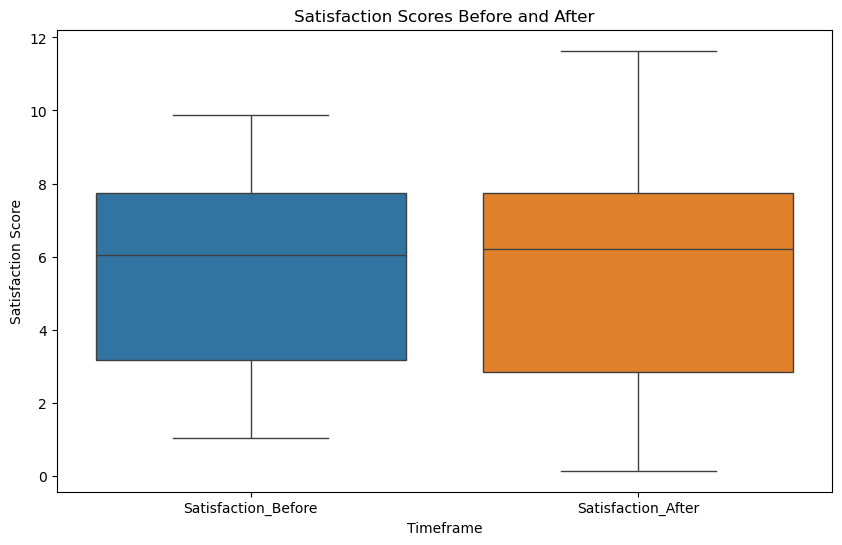

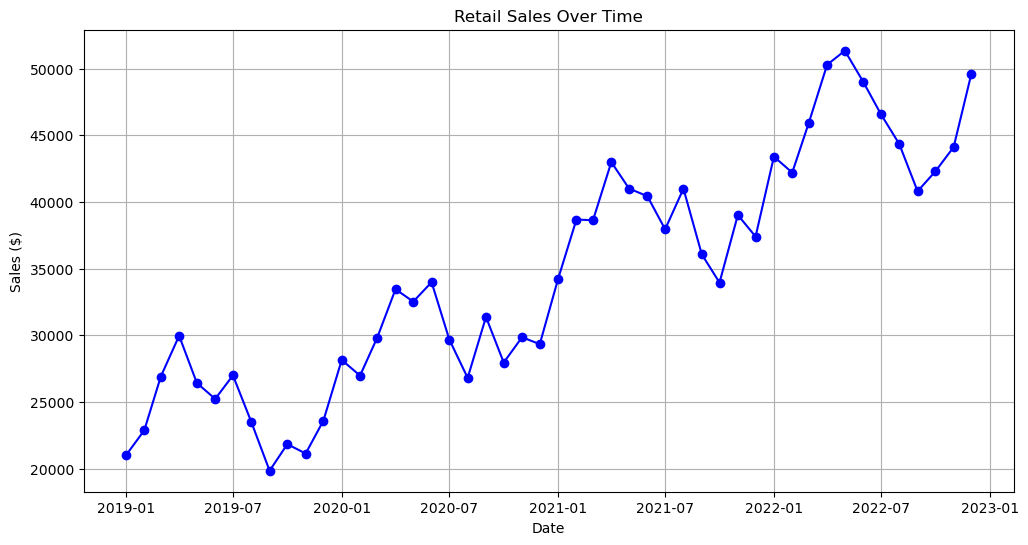

In [13]:
# Visualization before and after 
plt.figure(figsize=(10, 6))
sns.boxplot(data=data[["Satisfaction_Before", "Satisfaction_After"]])
plt.title("Satisfaction Scores Before and After")
plt.ylabel("Satisfaction Score")
plt.xlabel("Timeframe")
plt.show()

# Visualize retail sales trends over time
plt.figure(figsize=(12, 6))
plt.plot(retail_sales_data["Date"], retail_sales_data["Sales"], marker="o", linestyle="-", color="blue")
plt.title("Retail Sales Over Time")
plt.ylabel("Sales ($)")
plt.xlabel("Date")
plt.grid(True)
plt.show()

In [14]:
# Feature engineering (e.g., using 'Date' to create time-based features)
retail_sales_data['Month'] = retail_sales_data['Date'].dt.month
retail_sales_data['Year'] = retail_sales_data['Date'].dt.year
# Prepare features (X) and target (y)
X = retail_sales_data[['Month', 'Year']]
y = retail_sales_data['Sales']

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict and evaluate
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)

print(f"Mean Squared Error (MSE): {mse}")

Mean Squared Error (MSE): 13189446.096373336


In [ ]:
# Are you sure you did this on your own? how did you insert the figures 